# UFO Sightings Analysis

## Load the CSV file
### Noah Code Starts here

In [1]:
# Import any needed functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
#import gmaps
import datetime

# This will hide any of the small pink messages
import warnings
warnings.filterwarnings("ignore")

# Import API Key
#from config import g_key

In [2]:
# Set file path
file = ("UFO_Data/US_UFO_Sightings.csv")

# Read the csv file
us_ufo_data = pd.read_csv(file)

In [3]:
# Display the csv file as a dataframe
us_ufo_df = pd.DataFrame(us_ufo_data)
us_ufo_df.head()

,Unnamed: 0,city,state,country,shape,comments,latitude,longitude,date,time
0,0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,3,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,4,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,5,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,7,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


In [4]:
# Remove the "Unnamed: 0" index row that accidently came through in the cleaned file
us_ufo_data = us_ufo_df.drop(columns = ["Unnamed: 0"])
us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


## Initial Analysis

### Learning more about our dataset

In [ ]:
# Find the length of the dataframe?
# How many sightings are recordered?
us_ufo_data.shape

In [ ]:
# What kind of datatypes are we looking at?
us_ufo_data.dtypes

In [ ]:
# What is the min and max range for the years?
us_ufo_min_year = us_ufo_data["date"].min()
us_ufo_min_year

us_ufo_max_year = us_ufo_data["date"].max()
us_ufo_max_year

print(f"This dataset ranges from sightings recorded in {us_ufo_min_year} to {us_ufo_max_year}")

In [ ]:
# What are all of the unique values given for the shape column?
alien_whips = us_ufo_data["shape"].unique()
alien_whips

### Where do aliens like to visit?

In [ ]:
# Look at the state data to see which state is most visited
# Use a groupby to get the count
state_group = us_ufo_data.groupby("state")
state_group

state_visits = state_group["time"].count()
state_visits

In [ ]:
# Get the names of all of the different drug regimens to be used in the x axis
states = us_ufo_data["state"].unique()

# Need to read the list alphabetically to match with tick locations
states_alph = sorted(states)
#states_alph

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(0, len(states))

tick_locations = []

for x in x_axis:
    tick_locations.append(x)


# Change the size of the chart to make it more readable
plt.figure(figsize = (15, 5))

# Plot the bar chart
plt.bar(x_axis, state_visits, align = "center")
plt.xticks(tick_locations, states_alph, rotation = 90)

# Add legend to match above chart visually
plt.legend(["Visits"], loc = "upper center")

# Create labels for the bar plot
plt.title("Total Documented Sightings per State")
plt.xlabel("State")
plt.ylabel("Number of Sightings in the State")

# Set limits for each chart
plt.xlim(-1, len(states_alph) + 0.5)
plt.ylim(0, max(state_visits) + 1000)

# Best practice to always include plt.show
# Even though it is not technically needed in jupyter notebooks
plt.show()

In [ ]:
# IGNORE THIS CELL

# # Generate a pie plot showing the distribution of visits across the states
# # Labels for the sections of our pie chart
# labels = states


# plt.figure(figsize = (35, 7))


# # Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
# plt.pie(state_visits, labels = state_visits.index.values, autopct="%1.1f%%", startangle=90)
# plt.title("Distribution of UFO Sightings for each state")

# # Display resulting plot
# plt.tight_layout()
# plt.show()

In [ ]:
# # What city within the most visited state?
california = us_ufo_data.loc[us_ufo_data["state"] == "ca"]
california

# What city is visited the most regardless of state visits? (Better vacation spot?)
city_group = california.groupby("city")
city_group

city_group_visits = city_group.count()["time"]
city_group_visits

city_group_visits = city_group_visits.reset_index("city")
city_group_visits

popular_ca_cities = city_group_visits.sort_values(["time"], ascending = False)
popular_ca_cities.head(5)

In [ ]:
# # Farshad way
# city_group = us_ufo_data.groupby(["state","city"])
# city_group

# city_group_visits = city_group.count()["time"]
# city_group_visits

# city_group_visits = city_group_visits.reset_index()
# city_group_visits

In [ ]:
# US Heatmap for alien visits over the years
# Configure gmaps
gmaps.configure(api_key = g_key)

# Use the lat and lng columns as the locations variable
locations = us_ufo_data[["Latitude", "Longitude"]]

# Use the state visits as the weight variable
# MIGHT HAVE TO MAKE A NEW ONE FOR CITY COUNTS IDK??
state_visits

In [ ]:
# Generate the map
# From class discussion, it is important to set a center, and a zoom level to help make the map display properly
# Got the center and zoom_level values through trial and error
fig = gmaps.figure(center=(25.0, 15.0), zoom_level = 1.8)

# Generate a new layer on the map - Heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = state_visits,
                                 dissipating = False, max_intensity = 100,
                                 point_radius = 3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

### What are they drivings??

In [ ]:
# # Farshad way

alien_cars = us_ufo_data.groupby("shape")
alien_cars

shape_count = alien_cars.count()["time"]
shape_count

alien_fav_whip = shape_count.reset_index()
alien_fav_whip

In [ ]:
# # Generate a pie plot showing the distribution of visits across the states
# # Labels for the sections of our pie chart
labels = alien_whips


plt.figure(figsize = (35, 7))


# # Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(shape_count, labels = shape_count.index.values, autopct="%1.1f%%", startangle=120)
plt.title("Weird shapes in the sky")
plt.legend(alien_whips, loc = "right") 

# # Display resulting plot
#plt.axis("equal")
plt.show()

### Best time for cow abduction?

In [ ]:
times = us_ufo_data.loc["time"]
times

#hours, us_ufo_data["time"] = map(int, "00:00".split(':'))
#hours

In [5]:
us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


In [ ]:
us_ufo_data.dtypes

In [16]:
us_ufo_data["hour"] = np.floor(us_ufo_data["time"].str.replace(":", "").astype("int") / 100)
us_ufo_data["hour"] %= 24 
us_ufo_data.head()



,city,state,country,shape,comments,latitude,longitude,date,time,day,month,year,hour
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30,10,10,1949,20.0
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00,10,10,1956,21.0
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00,10,10,1960,20.0
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00,10,10,1961,19.0
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45,10,10,1965,23.0


In [17]:
time_group = us_ufo_data.groupby("hour")

times_of_day = us_ufo_data["hour"].unique()
times_of_day.sort()

num_visits = time_group["hour"].count()
num_visits

hour
0.0     3520
1.0     2453
2.0     1746
3.0     1513
4.0     1175
5.0     1313
6.0      972
7.0      708
8.0      649
9.0      792
10.0     941
11.0     897
12.0    1051
13.0    1011
14.0    1004
15.0    1119
16.0    1272
17.0    2073
18.0    3252
19.0    4977
20.0    7109
21.0    9432
22.0    8616
23.0    5958
Name: hour, dtype: int64

In [18]:
us_ufo_data["hour"].max()

23.0

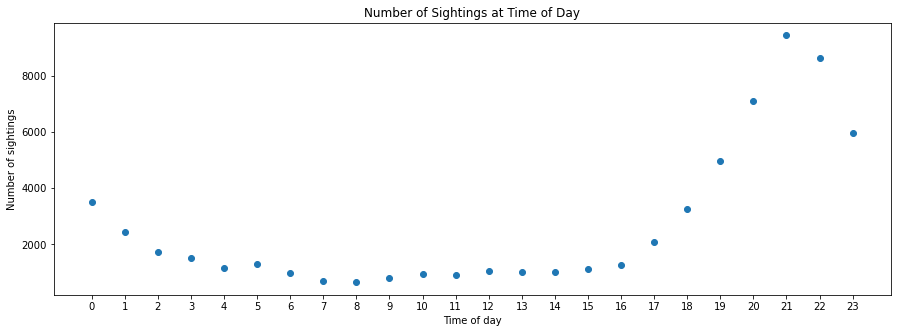

In [19]:
plt.figure(figsize = (15, 5))

# Scatter plot to see if the time of day has any correlation with total number of visits

plt.scatter(times_of_day, num_visits)


# Arrange tick labels
plt.xticks(np.arange(0, 24, 1))

# Set the title and x and y labels of the plot
plt.title("Number of Sightings at Time of Day")
plt.xlabel("Time of day")
plt.ylabel("Number of sightings")

# Best practice to use plt.show()
plt.show()

### Do they keep coming back?

In [7]:
calendar = us_ufo_data["date"].str.split("/", n = 2, expand = True)
us_ufo_data["day"] = calendar[0]
us_ufo_data["month"] = calendar[1]
us_ufo_data["year"] = calendar[2]

us_ufo_data.head()


,city,state,country,shape,comments,latitude,longitude,date,time,day,month,year
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30,10,10,1949
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00,10,10,1956
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00,10,10,1960
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00,10,10,1961
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45,10,10,1965


In [8]:
year_group = us_ufo_data.groupby("year")

years = us_ufo_data["year"].unique()
years.sort()

visits_per_year = year_group["year"].count()
visits_per_year

year
1910       2
1920       1
1925       1
1929       1
1931       2
        ... 
2010    3507
2011    4332
2012    6253
2013    5991
2014    1931
Name: year, Length: 83, dtype: int64

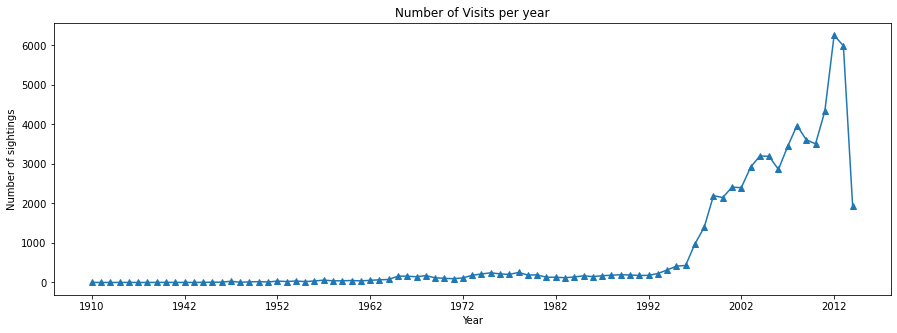

In [15]:
plt.figure(figsize = (15, 5))

# Scatter plot to see if the time of day has any correlation with total number of visits

plt.plot(years, visits_per_year, marker = "^")


# Arrange tick labels
plt.xticks(np.arange(0, 84, 10))

# Set the title and x and y labels of the plot
plt.title("Number of Visits per year")
plt.xlabel("Year")
plt.ylabel("Number of sightings")

# Best practice to use plt.show()
plt.show()

### Noah Code Ends here

## Deeper Analysis
### Mahnoor Code Starts here

### Regression or hypothesis testing

In [ ]:
# Regression possibilities

#    Can we predict the number of total sightings for 2016?
#    What city will have the highest visits in 2016?
#    Can we predict what region an alien is most likely to visit on their next vacation to earth?

In [ ]:
# Hypothesis testing possibilities

#    We believe that aliens prefer to visit at night, and that sightings will most likely happen between 10pm and 2am
#    We think us excitement around aliens peaks around halloween, so the majority of sightings will be in the fall (Sept - Nov)
#    We believe the midwest, not the southwest (area 51) will have the most sightings (More cows to abduct!!)
#    Is area 51 (Nevada and surrounding area) truly the hub of all recorded alien activity??

In [ ]:
## We could potentially look at the 2016 csv we almost used to see how accurate our predictions were??
## Idk if that would be a stretch or like bad to compare (apples to oranges?)

### Mahnoor Code Ends here